## 우선, 1월 데이터만 바라보자

# STEP1. Data

In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv('1월.csv')

In [3]:
data1.head(3)

,id,price,qty,quote_qty,time,is_buyer_maker
0,3166744581,16537.5,0.004,66.15,1672531204118,True
1,3166744582,16537.6,0.116,1918.36,1672531204178,False
2,3166744583,16537.6,0.034,562.27,1672531204178,False


# STEP2. EDA

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78708882 entries, 0 to 78708881
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   price           float64
 2   qty             float64
 3   quote_qty       float64
 4   time            int64  
 5   is_buyer_maker  bool   
dtypes: bool(1), float64(3), int64(2)
memory usage: 3.0 GB


6개 컬럼 중 5개 수치형, 1개 bool형
- bool형을 원핫인코딩? 0 or 1로 처리하자

In [5]:
data1.isna().sum()

id                0
price             0
qty               0
quote_qty         0
time              0
is_buyer_maker    0
dtype: int64

결측치 없다. Good

In [6]:
print("The Length of The Data: ", len(data1))

The Length of The Data:  78708882


행의 개수 많다

In [7]:
print("The Shape of The Data: ", data1.shape)

The Shape of The Data:  (78708882, 6)


In [8]:
print("The Statistical Calculations: ")
data1.describe()

The Statistical Calculations: 


,id,price,qty,quote_qty,time
count,7.870888e+07,7.870888e+07,7.870888e+07,7.870888e+07,7.870888e+07
mean,3.206989e+09,2.095047e+04,1.792048e-01,3.707090e+03,1.674078e+12
std,2.388387e+07,2.194725e+03,5.725128e-01,1.186605e+04,6.533511e+08
min,3.166745e+09,1.648800e+04,1.000000e-03,1.170000e+00,1.672531e+12
25%,3.186431e+09,1.930300e+04,5.000000e-03,1.010000e+02,1.673634e+12
50%,3.206129e+09,2.117290e+04,3.000000e-02,6.237200e+02,1.674061e+12
75%,3.226289e+09,2.290070e+04,1.570000e-01,3.199780e+03,1.674574e+12
max,3.249157e+09,2.396270e+04,5.227830e+02,8.238598e+06,1.675210e+12


통계량 수치 확인

In [9]:
print(f"There are {data1.duplicated().sum()} duplicated rows in the data set.")

There are 0 duplicated rows in the data set.


중복 행 없다, OK

In [10]:
data1.corr()

,id,price,qty,quote_qty,time,is_buyer_maker
id,1.000000,0.925630,-0.037345,-0.005498,0.988850,0.007048
price,0.925630,1.000000,-0.037549,-0.002160,0.929764,0.005590
qty,-0.037345,-0.037549,1.000000,0.988215,-0.035872,-0.000197
quote_qty,-0.005498,-0.002160,0.988215,1.000000,-0.003816,0.000074
time,0.988850,0.929764,-0.035872,-0.003816,1.000000,0.006322
is_buyer_maker,0.007048,0.005590,-0.000197,0.000074,0.006322,1.000000


컬럼 간 상관계수 확인

# STEP3. Visualization

In [11]:
import seaborn as sns

<Axes: >

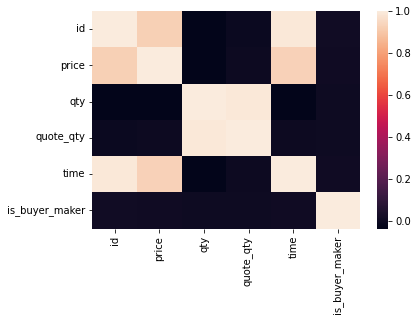

In [12]:
sns.heatmap(data1.corr())

데이터 컬럼 히트맵 시각화

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Top 4 Pairs with High Positive Correlation:
id         time         0.988850
time       id           0.988850
qty        quote_qty    0.988215
quote_qty  qty          0.988215
dtype: float64




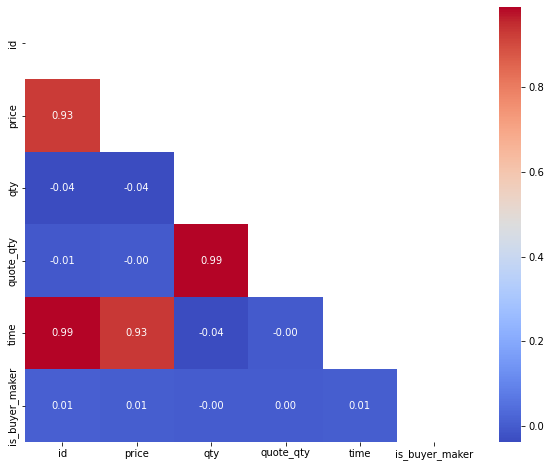

In [14]:
corr_matrix = data1.corr()

# 대각선과 그 이하의 삼각형 부분을 마스킹
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

# 양의 상관계수가 높은 4개 쌍
top_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
top_positive_corr_pairs = top_corr_pairs[(top_corr_pairs > 0) & (top_corr_pairs < 1)].head(4)

print("Top 4 Pairs with High Positive Correlation:")
print(top_positive_corr_pairs)
print('\n')
plt.show()

양의 상관계수가 높은 4개 쌍 추출

> 그런데, 여기에서 우리는 고려해야할 게 있다   
    - id는 식별 번호이기에 거래를 구분하는 용도로만 사용된다. 의미가 있나?   
    - quote_qy = price*qty = 거래의 규모 이기에 이들간 관계는 무의미하다 생각함   
    - 유닉스 타임스탬프시간 time도 처리 필요, 어떤 관계가 있을까  
    - is_buy_market은 인코딩?

<Axes: xlabel='price'>

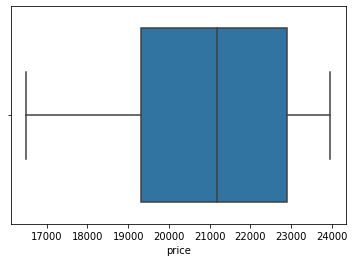

In [15]:
sns.boxplot(x='price', data = data1)

박스플롯 시각화하여 이상치 outlier 확인

# STEP4. Pre-Processing

In [16]:
from datetime import datetime

unix_timestamp = int('1669077418 ')
print(datetime.utcfromtimestamp(unix_timestamp))

2022-11-22 00:36:58


이런 형식으로 time 컬럼 전체 변환해 시계열 분석 가능하게   
-> datetime모듈의 utcfromtimestamp함수를 사용하면 unixtimestamp를 datetime 형식으로 변환가능하다.

In [17]:
# time 컬럼을 datetime으로 변환
# data1['time'] = pd.to_datetime(data1['time'], unit='s') 
# OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 54970-05-28 01:08:38 에러 발생

data1['time'] = pd.to_datetime(data1['time'], unit='ms')

In [18]:
data1['is_buyer_maker'] = data1['is_buyer_maker'].astype(int)

In [19]:
data1 = data1.drop('id', axis=1)

- id column 제거
- is_buyer_market 0 or 1 매핑 진행

In [20]:
data1.head(3)

,price,qty,quote_qty,time,is_buyer_maker
0,16537.5,0.004,66.15,2023-01-01 00:00:04.118,1
1,16537.6,0.116,1918.36,2023-01-01 00:00:04.178,0
2,16537.6,0.034,562.27,2023-01-01 00:00:04.178,0


<Axes: >

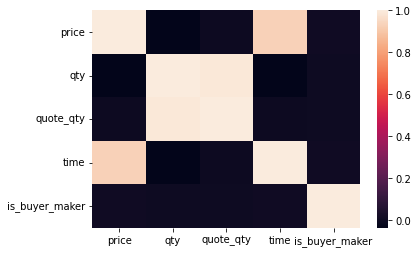

In [21]:
sns.heatmap(data1.corr())

Top 3 Pairs with High Positive Correlation:
qty        quote_qty    0.988215
quote_qty  qty          0.988215
time       price        0.929764
dtype: float64




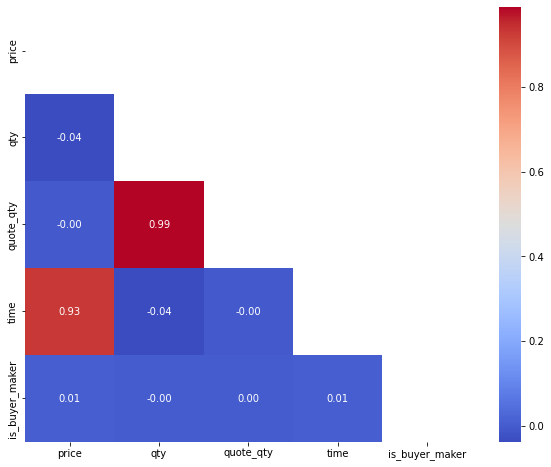

In [22]:
corr_matrix = data1.corr()

# 대각선과 그 이하의 삼각형 부분을 마스킹
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

# 양의 상관계수가 높은 3개 쌍
top_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
top_positive_corr_pairs = top_corr_pairs[(top_corr_pairs > 0) & (top_corr_pairs < 1)].head(3)

print("Top 3 Pairs with High Positive Correlation:")
print(top_positive_corr_pairs)
print('\n')
plt.show()

In [23]:
# 필요한 라이브러리 임포트
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [28]:
# 데이터프레임에서 'time' 열을 에포크 시간으로 변환
data1['time_epoch'] = data1['time'].astype('int64') // 10**9  # 초 단위로 변환

그냥 time column 사용하니 오류 발생, 
- 데이터프레임에서 날짜/시간 형식을 숫자로 변환하는 방법은 다양
- 가장 일반적인 방법 중 하나는 날짜/시간을 에포크 시간(epoch time)으로 변환하는 것
- 에포크 시간은 보통 1970년 1월 1일부터 현재까지의 경과 시간을 초 단위로 나타내는 값

In [29]:
# 데이터 준비 및 전처리
X = data1[['time_epoch', 'price']]
Y = data1['qty']

In [30]:
# 훈련 및 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

훈련:테스트=8:2인데 검증용도 넣을까?

In [ ]:
# 랜덤 포레스트 앙상블 모델 생성 및 훈련
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

1시간 넘어도 완성 X...

In [ ]:
# 모델 예측
Y_pred = rf_model.predict(X_test)

# 성능 평가
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

> 전체적인 방향 구성 필요
> - 데이터 12개 통합?
> - id 제거? 어떻게 하지
> - X와 Y로 사용할 컬럼 지정 혹은 제작
> - 데이터 전처리..time column, is_buyer_maker 등 고려
> - 현재 Q&A 에도 예측 관련 질문 多 살펴보기
> - 데이터 용량..chunk 단위 로딩?

## 매수/매도 비율 계산

In [8]:
# 매수 거래량
buy_volume = df2[df2['is_buyer_maker'] == True]['qty'].sum()

# 매도 거래량
sell_volume = df2[df2['is_buyer_maker'] == False]['qty'].sum()

In [9]:
# 매수/매도 비율 계산
buy_sell_ratio = buy_volume / sell_volume

In [10]:
print("매수/매도 비율:", buy_sell_ratio)

매수/매도 비율: 0.9848719693983446
